## __LKS DIKMEN PROVINSI JATIM 2025__
---
#### ___No             :___      __10__
#### ___Aasal Sekolah  :___      __SMKN 1 Mejayan__
#### ___Nama           :___      __Sofyan Gio Verdiansyah & Aby Danu Prasetyo__
---

### Import Library

yang di di per bolehkan oleh juri

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA & PreProcessing Train Dataset

## Exploratory Data Analysis

import dataset dan memahami struktur dataset

In [150]:
df = pd.read_csv('../data/Datafull train.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32849 entries, 0 to 32848
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0x      32849 non-null  float64
 1   0y      32849 non-null  float64
 2   1x      32849 non-null  float64
 3   1y      32849 non-null  float64
 4   2x      32849 non-null  float64
 5   2y      32849 non-null  float64
 6   3x      32849 non-null  float64
 7   3y      32849 non-null  float64
 8   4x      32849 non-null  float64
 9   4y      32849 non-null  float64
 10  5x      32849 non-null  float64
 11  5y      32849 non-null  float64
 12  6x      32849 non-null  float64
 13  6y      32849 non-null  float64
 14  7x      32849 non-null  float64
 15  7y      32849 non-null  float64
 16  8x      32849 non-null  float64
 17  8y      32849 non-null  float64
 18  9x      32849 non-null  float64
 19  9y      32849 non-null  float64
 20  10x     32849 non-null  float64
 21  10y     32849 non-null  float64
 22

#### Memberikan Style ke table agar table lebih menarik dan mudah di baca

In [151]:
color_variance = ['#0b559f', '#2b7bba', '#539ecd', '#89bedc', '#bad6eb', '#dbe9f6']

df_style = {
    "border" : "1px solid black",
    "border-collapse" : "collapse",
    "color" : "white",
    "background-color" : color_variance[0],
    "font-szie" : "14px"
}

table_style = [
    {"selector" : "th", "props": [("background-color" , color_variance[0]), ("border", "1px solid black"), ("color", "white")]},
    {"selector" : "th.col_heading", "props": [("background-color" , color_variance[0]), ("border", "1px solid black"), ("color", "white")]},
    {"selector" : "th.row_heading", "props": [("background-color" , color_variance[0]), ("border", "1px solid black"), ("color", "white")]},
    {"selector" : "tr:nth-child(even) td", "props": [("background-color" , color_variance[2])]},
    {"selector" : "tr:nth-child(odd) td", "props": [("background-color" , color_variance[1])]},
    {"selector" : "td", "props": [("border" , "1px solid black")]}
]

### Preview dataset

In [152]:
df.head().style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,449.894000,638.530000,329.537000,588.029000,262.366000,475.709000,253.967000,343.421000,247.663000,236.477000,359.708000,371.450000,364.767000,244.302000,358.949000,332.212000,359.531000,392.781000,436.194000,386.681000,443.413000,254.785000,422.449000,389.207000,424.906000,456.209000,510.186000,403.627000,522.407000,285.094000,490.956000,417.518000,494.131000,475.346000,591.398000,426.475000,592.339000,341.419000,548.671000,413.658000,541.039000,454.239000,nan
1,459.426000,638.641000,347.614000,599.550000,273.522000,486.969000,262.374000,354.810000,248.102000,248.011000,360.925000,374.588000,373.911000,243.114000,369.098000,328.899000,364.611000,393.163000,437.945000,389.061000,448.776000,248.740000,427.998000,383.067000,424.256000,456.097000,509.395000,404.862000,526.426000,276.091000,496.461000,407.832000,492.551000,471.021000,587.605000,425.540000,598.047000,337.165000,559.660000,410.858000,548.164000,455.238000,A
2,444.194000,659.268000,326.598000,616.910000,253.226000,497.914000,243.082000,361.876000,239.491000,259.676000,343.380000,363.937000,354.870000,244.351000,358.127000,343.693000,360.158000,413.798000,418.447000,374.496000,427.227000,265.603000,412.909000,399.414000,413.379000,462.574000,487.232000,390.883000,503.429000,294.534000,477.267000,425.357000,476.143000,476.613000,560.803000,418.030000,567.584000,346.090000,533.656000,416.844000,524.283000,450.811000,A
3,443.780000,650.429000,324.970000,607.825000,252.818000,487.201000,244.345000,356.561000,243.655000,256.638000,354.901000,367.226000,360.576000,246.427000,360.391000,346.481000,365.212000,413.227000,425.959000,380.323000,434.270000,265.427000,415.955000,403.168000,416.489000,460.397000,493.925000,395.117000,512.095000,291.894000,481.303000,424.206000,478.711000,473.187000,573.173000,418.568000,580.205000,339.026000,541.187000,411.295000,528.062000,445.777000,A
4,452.860000,638.769000,340.436000,595.407000,272.323000,487.497000,254.365000,357.569000,231.482000,241.993000,345.978000,381.637000,359.122000,239.129000,353.375000,323.262000,345.418000,384.235000,424.534000,395.104000,437.792000,249.516000,418.391000,374.156000,413.062000,437.416000,499.487000,409.557000,510.173000,280.568000,485.889000,408.379000,484.368000,463.566000,577.341000,425.073000,581.486000,337.553000,551.375000,410.228000,546.574000,449.936000,A


### Membagi Kolom Numerik dan Kategorikal untuk memudahkan Analisis

In [153]:
num_col = df.select_dtypes(include='number').columns.to_list()
cat_col = df.select_dtypes(include='object').columns.to_list()

print(f'Numerikal Kolom : {num_col}')
print(f'Kategorikal Kolom : {cat_col}')

Numerikal Kolom : ['0x', '0y', '1x', '1y', '2x', '2y', '3x', '3y', '4x', '4y', '5x', '5y', '6x', '6y', '7x', '7y', '8x', '8y', '9x', '9y', '10x', '10y', '11x', '11y', '12x', '12y', '13x', '13y', '14x', '14y', '15x', '15y', '16x', '16y', '17x', '17y', '18x', '18y', '19x', '19y', '20x', '20y']
Kategorikal Kolom : ['char']


### Cek Nilai Unik di kolom kategori

ini untuk menganalisa jika terjadi anomali values di dalam kolom yang tidak terdeteksi sebagai null dan jika nilai nya sedikit maka akan susah mencari nya contoh seperti __?, nan__ dan lain sebagainya

In [154]:
for col in cat_col:
    print(f'{col} : {df[col].unique()}')

char : [nan 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y']


### Cek Missing Values

In [155]:
df.isnull().sum().to_frame().T.style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,7,2,3,5,1,0,1,0,0,0,0,24


### Mengisi Nilai Nan di kolom char dengan Forward Fill

In [156]:
df['char'] = df['char'].fillna(df['char'].ffill())
df.head().style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,449.894000,638.530000,329.537000,588.029000,262.366000,475.709000,253.967000,343.421000,247.663000,236.477000,359.708000,371.450000,364.767000,244.302000,358.949000,332.212000,359.531000,392.781000,436.194000,386.681000,443.413000,254.785000,422.449000,389.207000,424.906000,456.209000,510.186000,403.627000,522.407000,285.094000,490.956000,417.518000,494.131000,475.346000,591.398000,426.475000,592.339000,341.419000,548.671000,413.658000,541.039000,454.239000,nan
1,459.426000,638.641000,347.614000,599.550000,273.522000,486.969000,262.374000,354.810000,248.102000,248.011000,360.925000,374.588000,373.911000,243.114000,369.098000,328.899000,364.611000,393.163000,437.945000,389.061000,448.776000,248.740000,427.998000,383.067000,424.256000,456.097000,509.395000,404.862000,526.426000,276.091000,496.461000,407.832000,492.551000,471.021000,587.605000,425.540000,598.047000,337.165000,559.660000,410.858000,548.164000,455.238000,A
2,444.194000,659.268000,326.598000,616.910000,253.226000,497.914000,243.082000,361.876000,239.491000,259.676000,343.380000,363.937000,354.870000,244.351000,358.127000,343.693000,360.158000,413.798000,418.447000,374.496000,427.227000,265.603000,412.909000,399.414000,413.379000,462.574000,487.232000,390.883000,503.429000,294.534000,477.267000,425.357000,476.143000,476.613000,560.803000,418.030000,567.584000,346.090000,533.656000,416.844000,524.283000,450.811000,A
3,443.780000,650.429000,324.970000,607.825000,252.818000,487.201000,244.345000,356.561000,243.655000,256.638000,354.901000,367.226000,360.576000,246.427000,360.391000,346.481000,365.212000,413.227000,425.959000,380.323000,434.270000,265.427000,415.955000,403.168000,416.489000,460.397000,493.925000,395.117000,512.095000,291.894000,481.303000,424.206000,478.711000,473.187000,573.173000,418.568000,580.205000,339.026000,541.187000,411.295000,528.062000,445.777000,A
4,452.860000,638.769000,340.436000,595.407000,272.323000,487.497000,254.365000,357.569000,231.482000,241.993000,345.978000,381.637000,359.122000,239.129000,353.375000,323.262000,345.418000,384.235000,424.534000,395.104000,437.792000,249.516000,418.391000,374.156000,413.062000,437.416000,499.487000,409.557000,510.173000,280.568000,485.889000,408.379000,484.368000,463.566000,577.341000,425.073000,581.486000,337.553000,551.375000,410.228000,546.574000,449.936000,A


di kolom char ternyata masih ada __nan__, Mari kita cek lagi

In [157]:
df.isna().sum().to_frame().T.style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,7,2,3,5,1,0,1,0,0,0,0,1


bisa terlihat disini ternyata masih ada 1 nilai yang nan di kolom char, saya akan drop karena menurut saya ini tidak akan terlalu berpengaruh

### Drop Nilai Null atau Nan

In [158]:
df = df.dropna()
df.isnull().sum().to_frame().T.style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Disini Saya langsung melakukan drop ke data yang null karena untuk memudahkan visualisasi nanti nya

kenapa saya drop? karena menurut saya ini tidak akan terlalu berpengaruh, dimana kolom" yang ada nilai null nya jumlah nya tidak terlalu banyak dari total data sample nya jadi saya drop saja

teknik jika missing value nya lebih dari 15% 

In [159]:
# df['kolom'] = df['kolom'].fillna(df['kolom'].mean())
# df['kolom'] = df['kolom'].fillna(df['kolom'].median())
# df['kolom'] = df['kolom'].fillna(df['kolom'].mode())
# df['kolom'] = df['kolom'].fillna(df['kolom'].ffill())
# df['kolom'] = df['kolom'].fillna(df['kolom'].bfill())

### Cek Duplikasi Kolom

In [160]:
print(df.duplicated().sum())

23


ada 23 kolom yang ter duplikasi kita akan drop ini saat preprocessing nanti

### Cek Deskripsi Kolom Numerik

In [161]:
df.describe().T.style.set_properties(**df_style).set_table_styles(table_style)

,count,mean,std,min,25%,50%,75%,max
0x,32823.000000,452.482451,33.524101,26.970000,441.026500,450.210000,461.080500,846.956000
0y,32823.000000,475.711953,52.895769,0.000000,453.375500,468.696000,491.655500,964.173000
1x,32823.000000,427.714229,54.609009,0.000000,391.584000,413.545000,463.081500,822.414000
1y,32823.000000,445.095356,52.766469,0.000000,410.957500,436.449000,471.832500,861.044000
2x,32823.000000,423.448759,80.513566,-30.642000,365.080500,407.737000,479.737500,835.397000
2y,32823.000000,400.279506,69.220673,0.000000,352.673500,383.962000,433.297000,828.416000
3x,32823.000000,438.885798,101.512376,-67.560000,367.977500,430.574000,506.223500,854.552000
3y,32823.000000,362.274601,93.667863,0.000000,300.567500,337.858000,396.932500,837.067000
4x,32823.000000,452.682828,120.956526,-95.991000,374.030500,452.077000,530.467000,898.948000
4y,32823.000000,338.868804,114.752707,0.000000,264.219500,310.352000,375.734000,840.879000


### Cara Membaca Desripsi Kolom Numerik

- count : ini adalah total nilai sample dari kolom tersebut

- mean : ini adalah nilai rata ratanya

- std atau standar deviasi : ini menampilkan nilai seberapa tersebar data dari rata ratanya

- min : ini adalah nilai terkecil

- 25% : ini adalah nilai quartil 1

- 50% : ini adalah nilai quartil 2

- 75% : ini adalah nilai quartil 3

- max : ini adalah nilai terbesarnya

### Cek Deskripsi Kolom Kategorikal

In [162]:
df.describe(include='object').T.style.set_properties(**df_style).set_table_styles(table_style)

,count,unique,top,freq
char,32823,24,P,1677


### Cara Membaca Deskripsi Kategorikal

- count : ini adalah total nilai sample dari kolom tersebut

- unique : ini adalah jumlah nilai unik

- top : ini adalah nilai top nilai unik

- freq : ini adalah total jumlah nilai top yang tampil

## Insight

### Apakah Ada Outlier di Kolom Numerikal?

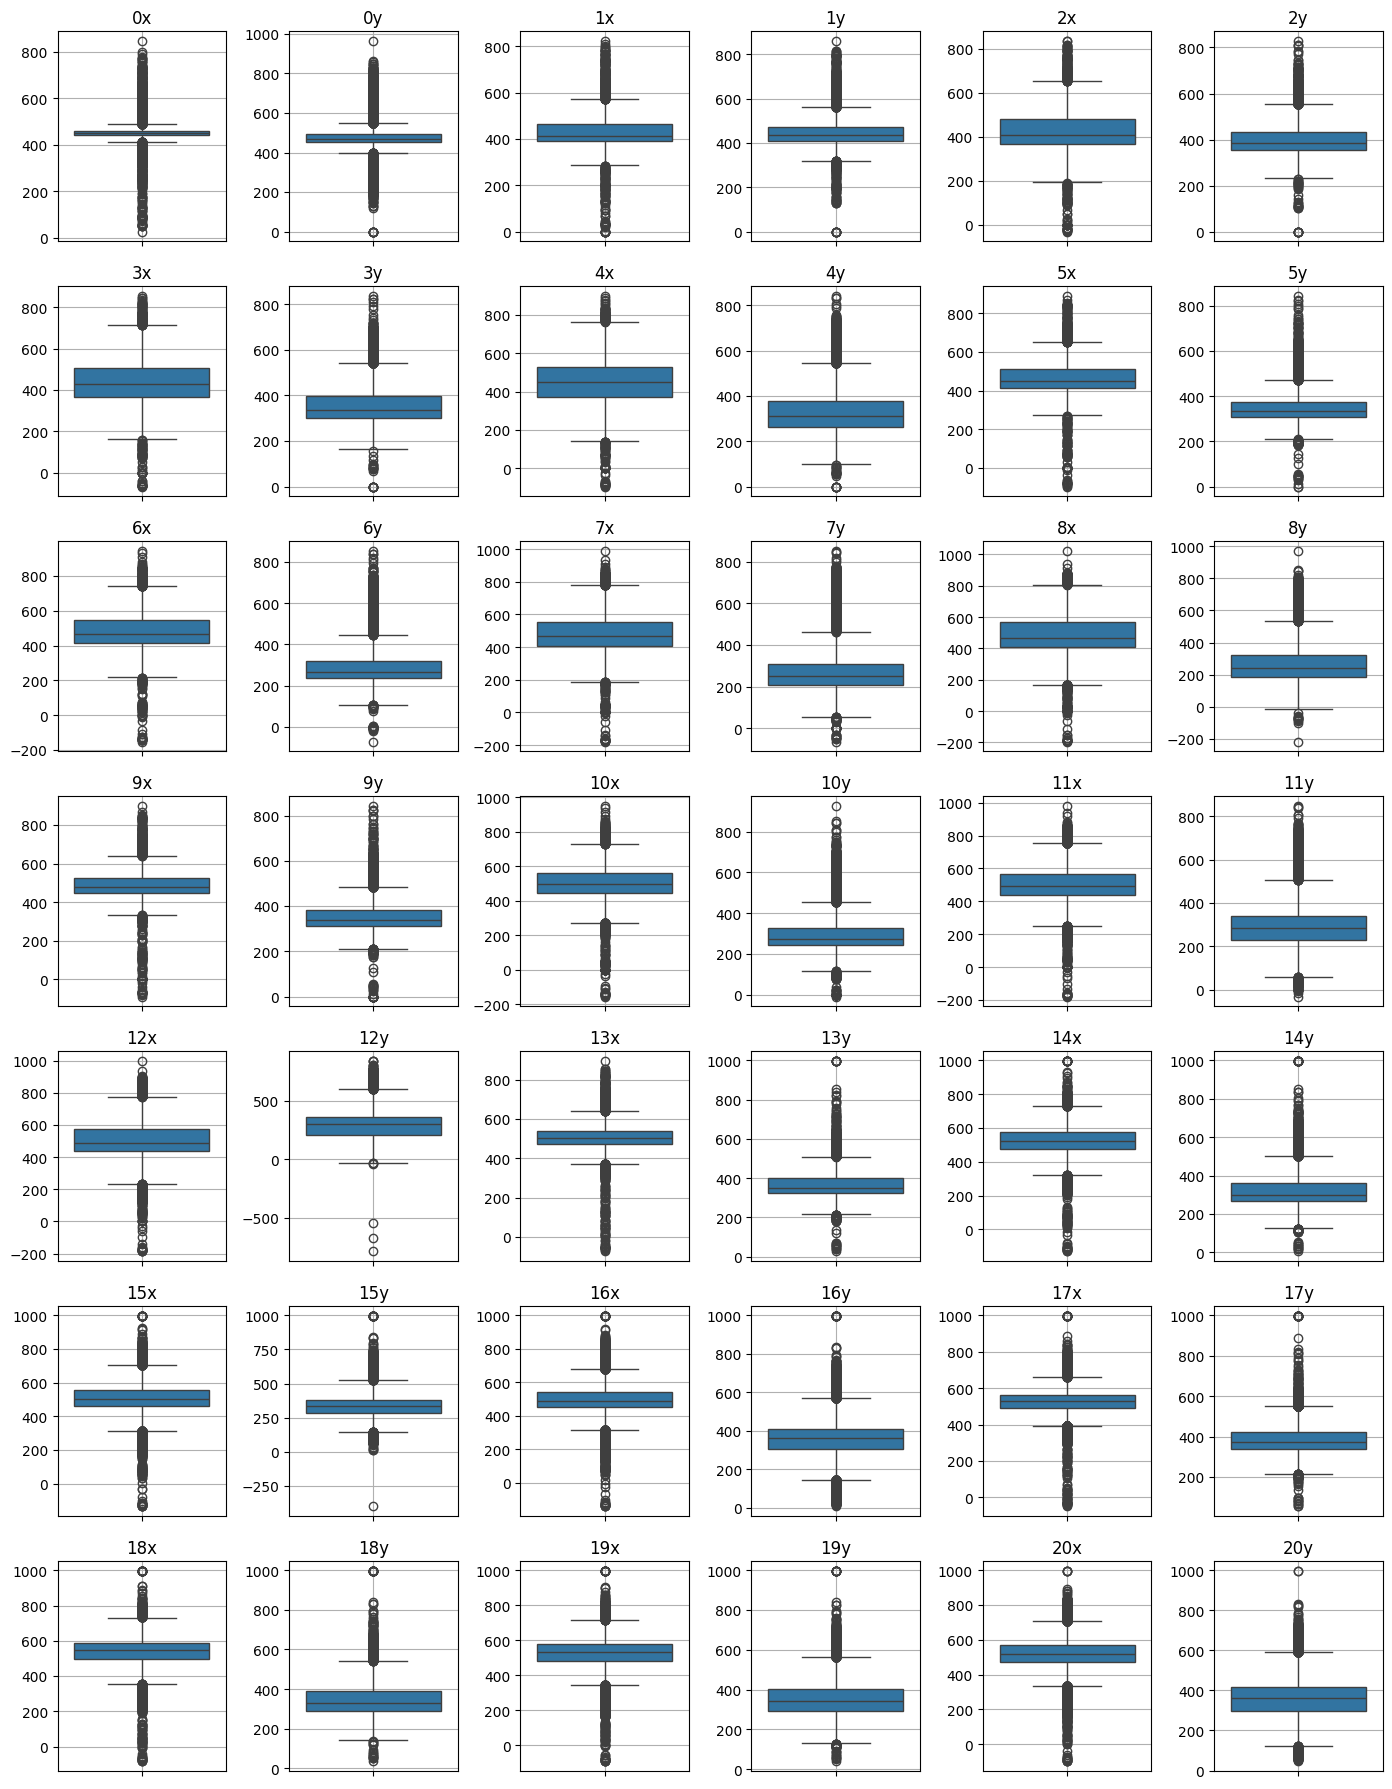

In [163]:
n_col = 6
n_rows = int(np.ceil(len(num_col) / n_col))

fig, axes = plt.subplots(n_rows, n_col, figsize=(n_rows * 2, n_col * 3))
axes = axes.flatten()

for i, col in enumerate(num_col):
    data = df[col]
    ax = axes[i]
    
    ax.set_title(col)
    sns.boxplot(y=data, ax=ax)
    ax.set_ylabel(None)
    ax.grid(True)
    
for j in range(len(num_col), n_rows * n_col):
    plt.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

__Hasil Analisis :__

berdasarkan kesimpulan saya disini terlihat beberapa kolom yang mengalami outlier, kita akan pertimbangkan ini apakah kita akan melakukan IQR atau kita akan membuat 2 kemungkinan dimana yang 1 akan lakukan IQR dan yang 1 tidak kita lakukan IQR, lalu kita akan bandingkan akurasi model saat evaluasi nanti apakah akurasi untuk yang kita lakukan IQR akan menurun atau meningkat begitu juga yang tidak kita IQR

### Apakah Kolom __Char (target)__ mengalami imbalance data?

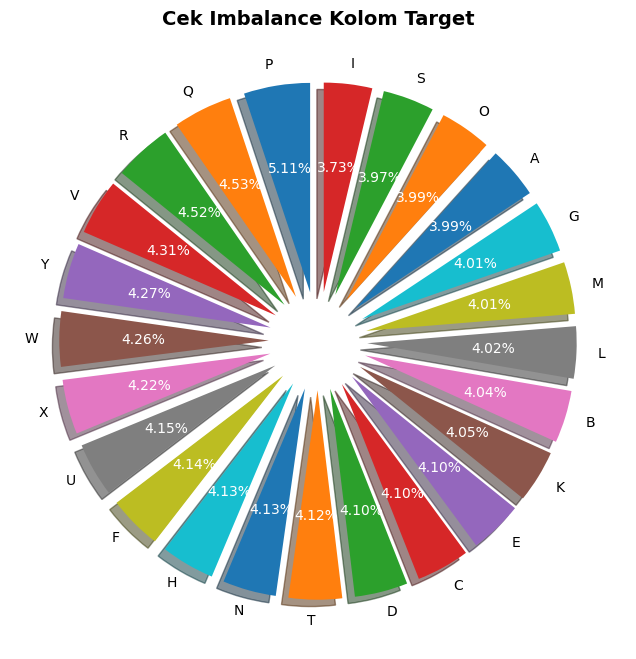

In [164]:
plt.figure(figsize=(12, 8))

plt.title("Cek Imbalance Kolom Target", fontsize=14, fontweight='bold')
wedges, texts, container = plt.pie(
    x=df["char"].value_counts(),
    labels=df["char"].value_counts().keys(),
    autopct="%.2f%%",
    shadow=True,
    explode=[0.2 for _ in range(24)],
    startangle=90,
    radius=0.85
)

for con in container:
    con.set_color(color="w")
    con.set_size(10)

plt.show()


__Hasil Analisis :__

data di kolom char (target) ini cukup balance dimana data nya tidak ada yang terlalu dominan dan disini datanya sudah cukup stabil semua jadi saya kira tidak perlu melakukan sampling


### HandKeypoint manakah yang memiliki titik koordinat terbanyak?

C:\Users\Aby Danu Prasetyo\AppData\Local\Temp\ipykernel_14152\2570734328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='char', palette='viridis')


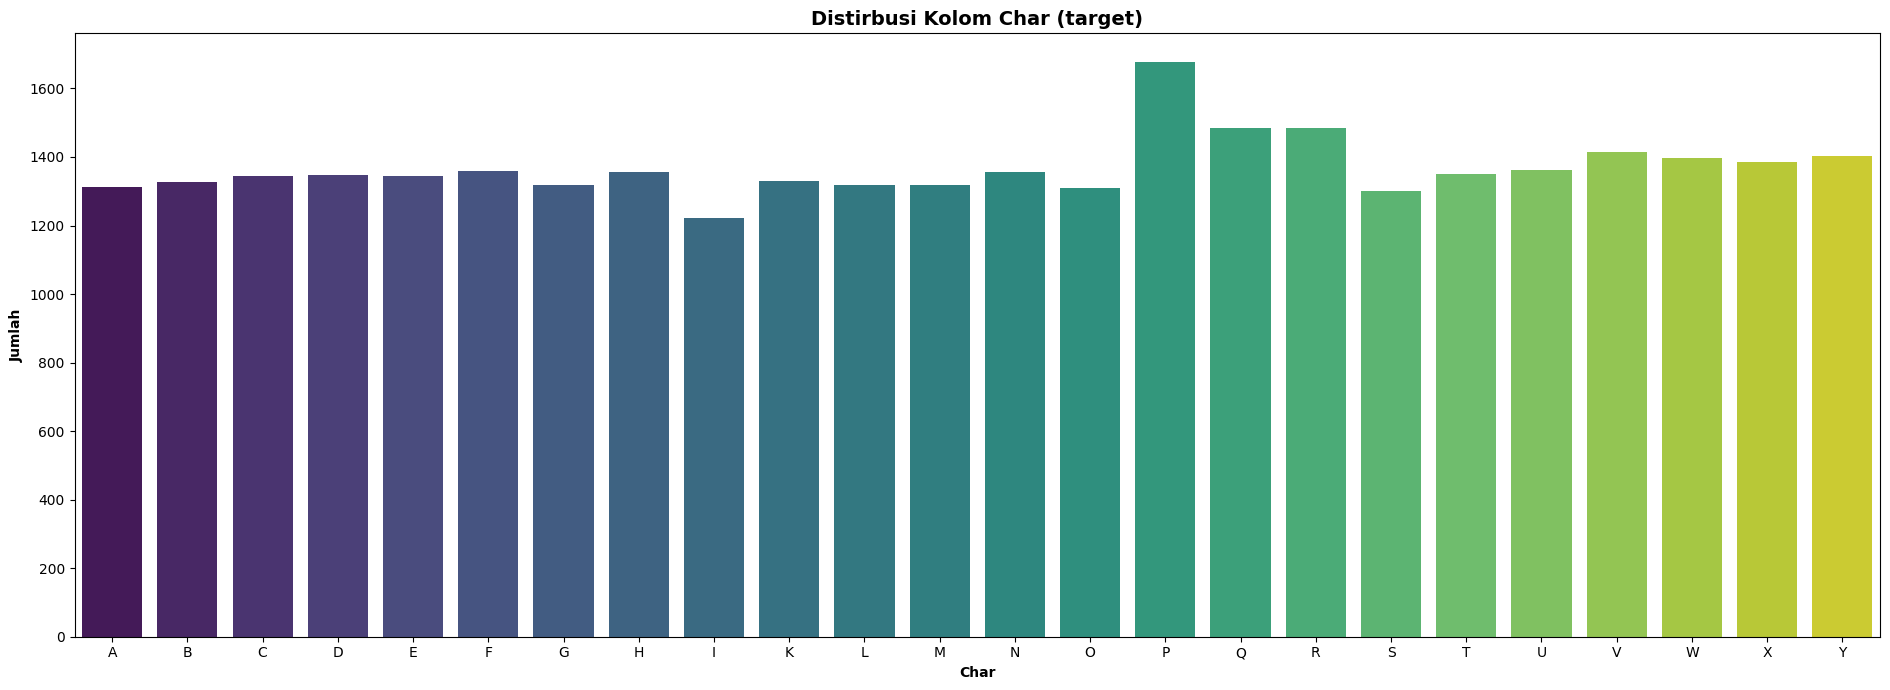

In [165]:
plt.figure(figsize=(19, 7))
sns.countplot(data=df, x='char', palette='viridis')
plt.title("Distirbusi Kolom Char (target)", fontsize=14, fontweight='bold')
plt.xlabel('Char', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.tight_layout()
plt.show()

__Hasil Analisis :__

Label P disini terlihat sangat menonjol dari Lebl yang lain, menurut saya ini karena Handkeypoint P ini gerakan tangan nya cukup sulit jadi titik koordinat yang di dapat dari HandKeyPoint cukup banyak sehingga Label P ini menjadi nilai yang cukup menonjol handkeypoint dari rata rata Label yang lain

### Encode Kolom kategorikal untuk melihat korelasi antar fitur terhadap target

In [166]:
def label_encoder(df: pd.DataFrame):
    struct = dict()
    
    for col in df.select_dtypes("object").columns:
        unq = df[col].unique()
        unq_map = {v: k for k, v in enumerate(unq)}
        
        struct[col] = unq_map
        df[col] = df[col].map(unq_map)
    
    return df, struct

df_encode = df.copy()
df_encode, struct = label_encoder(df_encode)
df_encode.head().style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
1,459.426000,638.641000,347.614000,599.550000,273.522000,486.969000,262.374000,354.810000,248.102000,248.011000,360.925000,374.588000,373.911000,243.114000,369.098000,328.899000,364.611000,393.163000,437.945000,389.061000,448.776000,248.740000,427.998000,383.067000,424.256000,456.097000,509.395000,404.862000,526.426000,276.091000,496.461000,407.832000,492.551000,471.021000,587.605000,425.540000,598.047000,337.165000,559.660000,410.858000,548.164000,455.238000,0
2,444.194000,659.268000,326.598000,616.910000,253.226000,497.914000,243.082000,361.876000,239.491000,259.676000,343.380000,363.937000,354.870000,244.351000,358.127000,343.693000,360.158000,413.798000,418.447000,374.496000,427.227000,265.603000,412.909000,399.414000,413.379000,462.574000,487.232000,390.883000,503.429000,294.534000,477.267000,425.357000,476.143000,476.613000,560.803000,418.030000,567.584000,346.090000,533.656000,416.844000,524.283000,450.811000,0
3,443.780000,650.429000,324.970000,607.825000,252.818000,487.201000,244.345000,356.561000,243.655000,256.638000,354.901000,367.226000,360.576000,246.427000,360.391000,346.481000,365.212000,413.227000,425.959000,380.323000,434.270000,265.427000,415.955000,403.168000,416.489000,460.397000,493.925000,395.117000,512.095000,291.894000,481.303000,424.206000,478.711000,473.187000,573.173000,418.568000,580.205000,339.026000,541.187000,411.295000,528.062000,445.777000,0
4,452.860000,638.769000,340.436000,595.407000,272.323000,487.497000,254.365000,357.569000,231.482000,241.993000,345.978000,381.637000,359.122000,239.129000,353.375000,323.262000,345.418000,384.235000,424.534000,395.104000,437.792000,249.516000,418.391000,374.156000,413.062000,437.416000,499.487000,409.557000,510.173000,280.568000,485.889000,408.379000,484.368000,463.566000,577.341000,425.073000,581.486000,337.553000,551.375000,410.228000,546.574000,449.936000,0
5,457.552000,653.649000,335.113000,624.058000,264.734000,510.101000,253.082000,378.250000,236.840000,269.307000,363.884000,381.668000,368.143000,253.612000,366.595000,342.386000,364.061000,404.599000,433.425000,392.995000,436.512000,269.523000,420.890000,394.754000,425.847000,454.859000,500.886000,410.315000,510.245000,292.087000,483.699000,418.551000,485.678000,474.730000,579.387000,435.620000,580.810000,350.078000,548.222000,420.887000,539.430000,455.738000,0


disini saya membuat variabel baru __df_enc__ ini adalah salinan data dari df untuk berjaga jaga jadi saya encode salinan dari dataframe yang asli

### Kolom manakah yang paling ber korelasi ke kolom target?

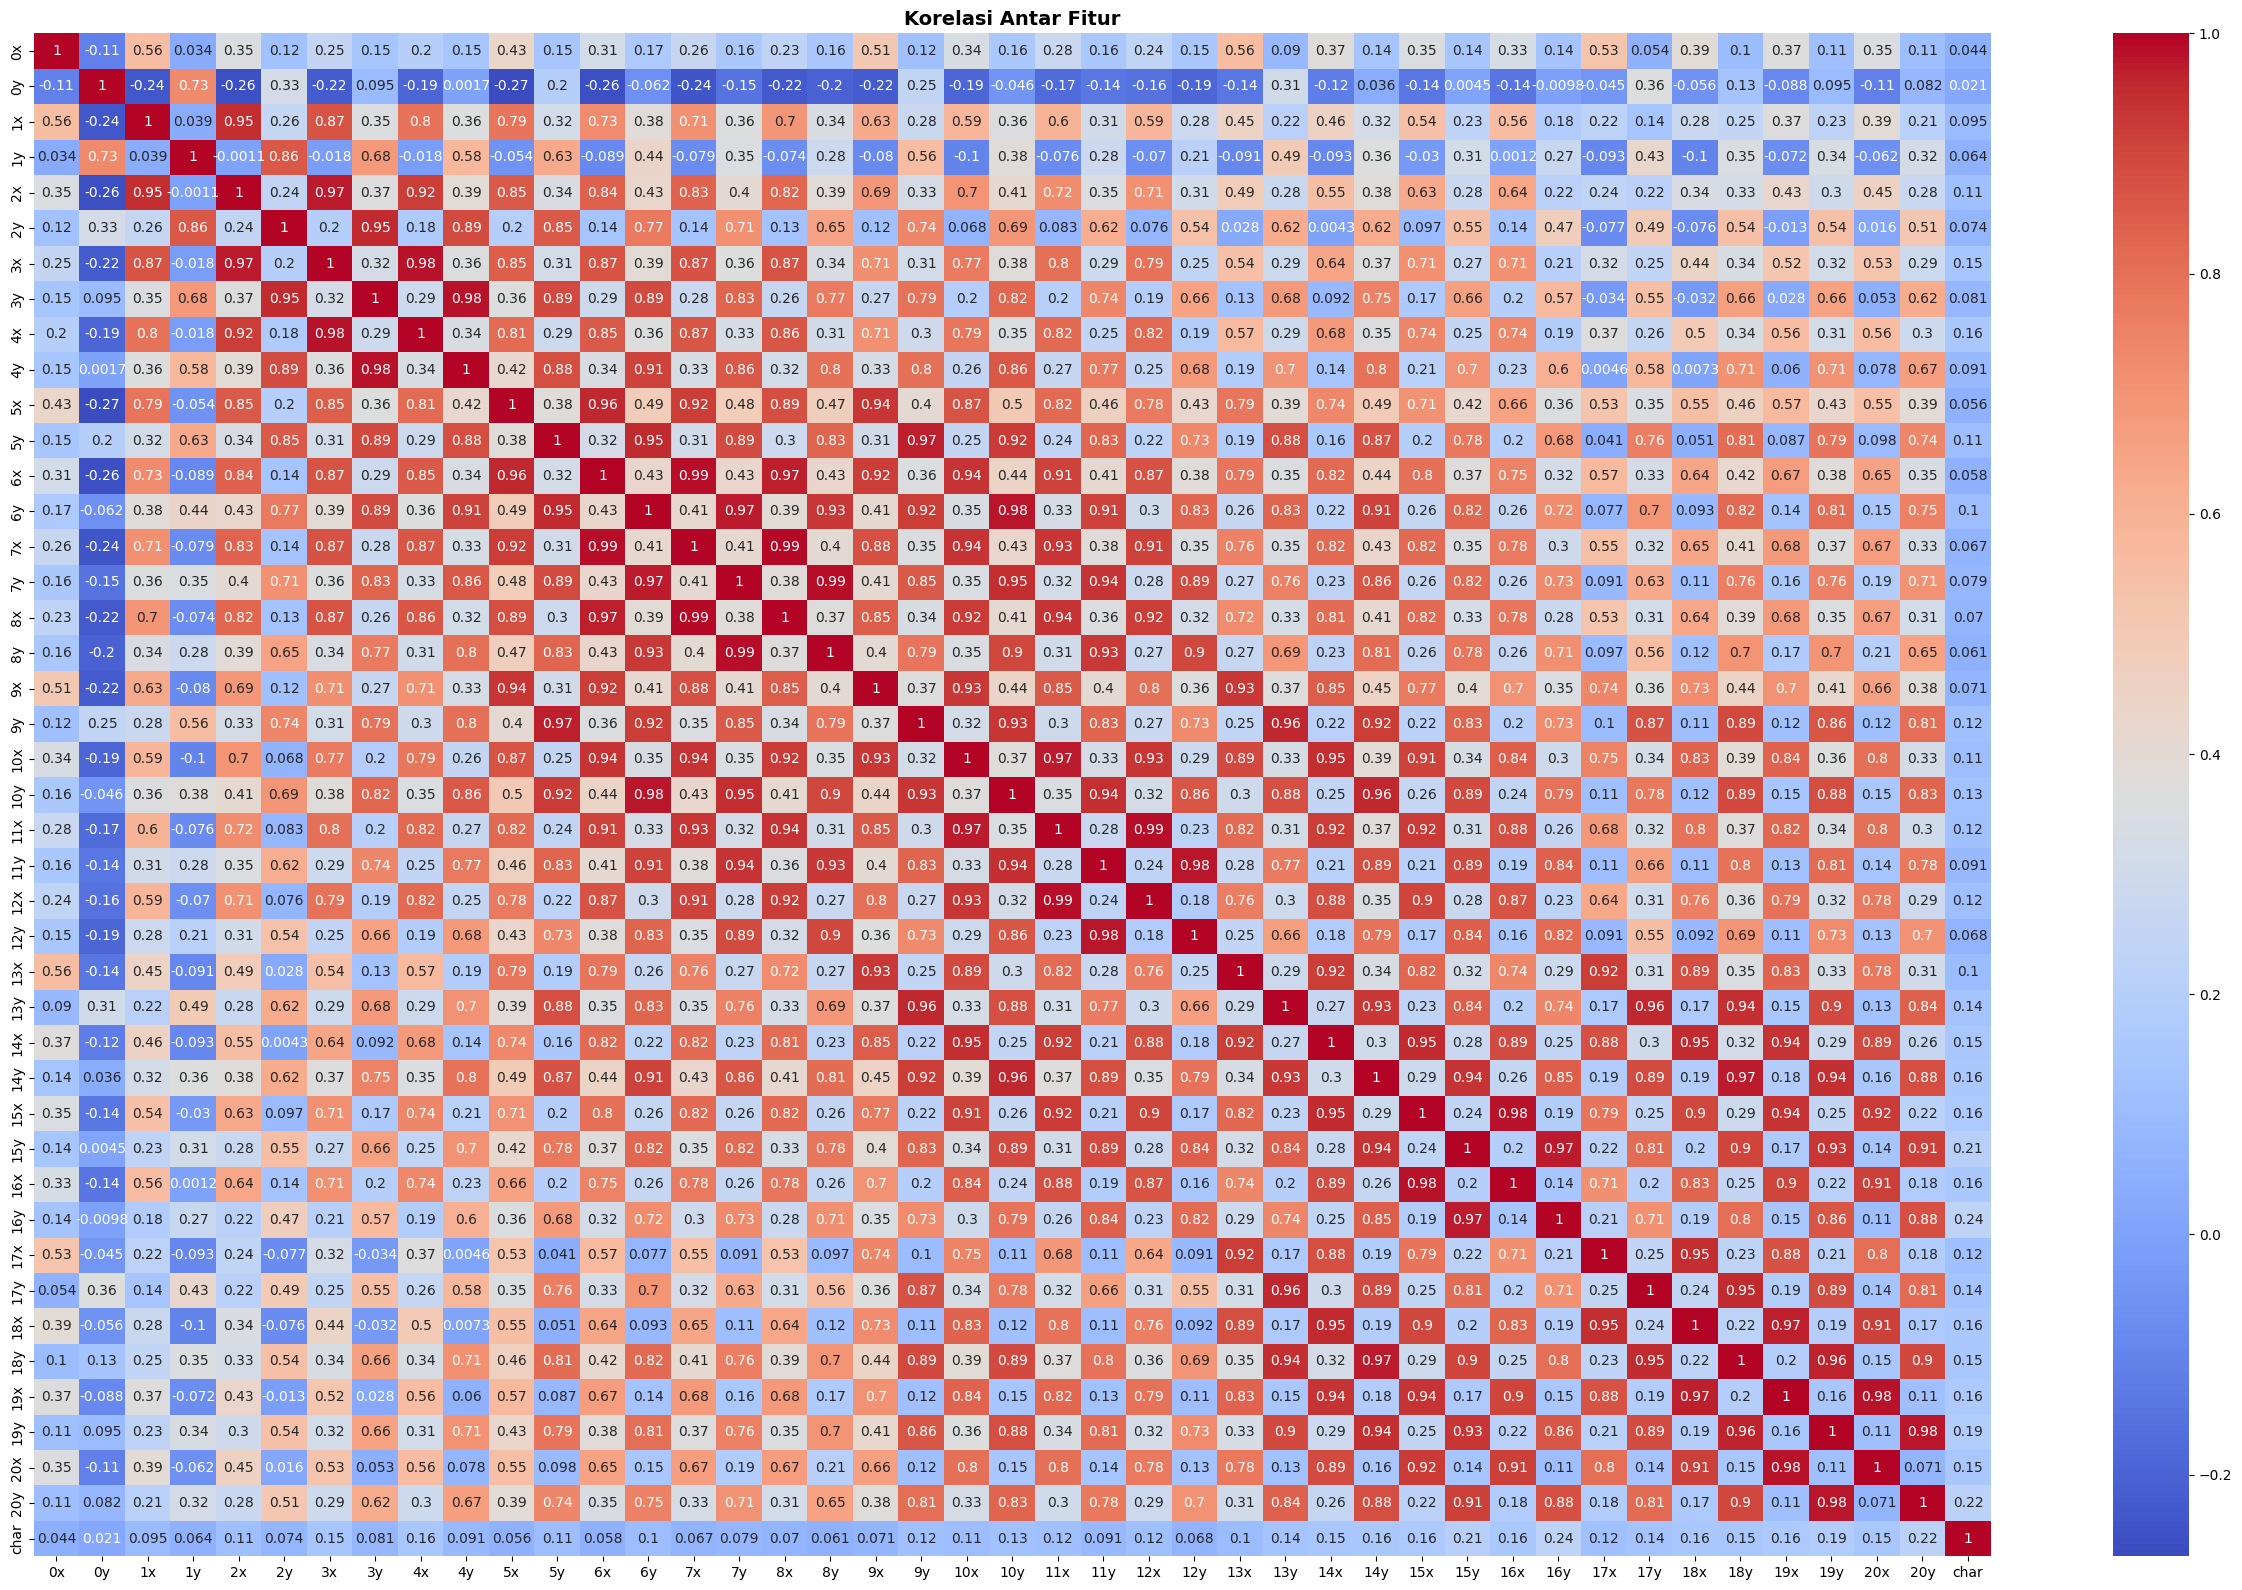

In [167]:
plt.figure(figsize=(25, 16))
sns.heatmap(df_encode.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

__Hasil Analisis :__

- Disini adalah Fitur yang kurang ber korelasi terhadap fitur target :
1. 0x, 0y
2. 1x, 1y
3. 2y
4. 3y
5. 4y
6. 5x
7. 6x
8. 7x, 7y
9. 8x, 8y
10. 9x
11. 11y
12. 12y

### Kolom Manakah yang paling ber pengaruh terhadap target berdasarkan Mutual Information?

In [168]:
def mutual_information(x, y, bins=10):
    x = np.digitize(x, bins=np.histogram_bin_edges(x, bins=bins))
    y = np.digitize(y, bins=np.histogram_bin_edges(y, bins=bins))

    N = len(x)
    mi = 0

    x_values = np.unique(x)
    y_values = np.unique(y)

    for xi in x_values:
        for yi in y_values:
            p_xy = np.sum((x == xi) & (y == yi)) / N
            if p_xy == 0:
                continue
            p_x = np.sum(x == xi) / N
            p_y = np.sum(y == yi) / N
            mi += p_xy * np.log2(p_xy / (p_x * p_y))

    return mi

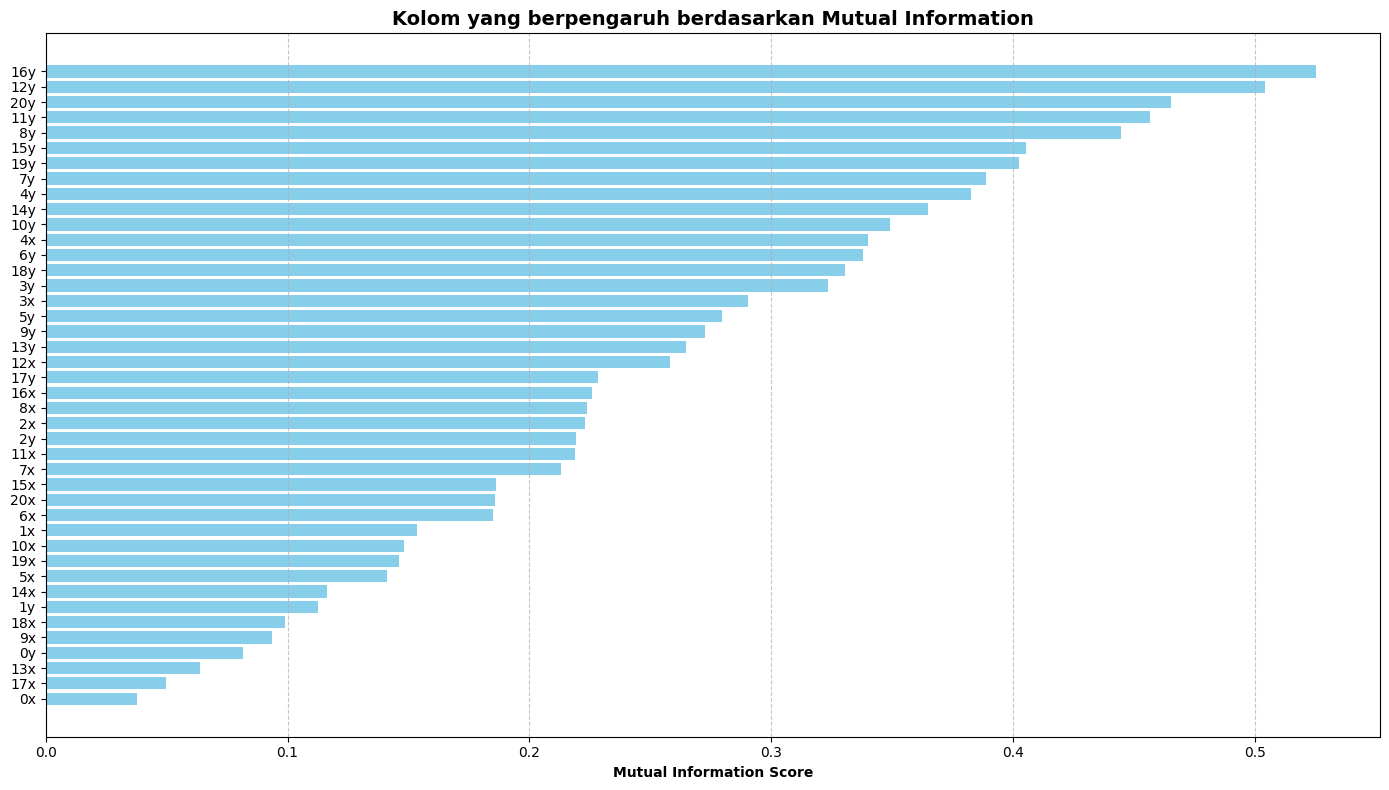

In [169]:
X = df_encode.drop(columns='char')
y = df_encode['char']

mi_scores = {col: mutual_information(X[col], y) for col in X.columns}

sorted_mi = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)
features = [k for k, _ in sorted_mi]
scores = [v for _, v in sorted_mi]

plt.figure(figsize=(14, 8))
bars = plt.barh(features[::-1], scores[::-1], color='skyblue')
plt.xlabel("Mutual Information Score", fontweight='bold')
plt.title("Kolom yang berpengaruh berdasarkan Mutual Information", fontsize=14, fontweight='bold')
# plt.axhline(y=np.where(df.columns[::-1] == '16y')[0][0] - 0.5,
#             color='red', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

__Hasil Analisis :__

- kolom yang kurang berpengaruh ke target :
1. 0x
2. 17x
3. 0y
4. 18x

karena fitur ini korelasi nya dibawah 0.1, maka ini bisa di biang tidak informatif dan tidak beprpengaruh terhadap target

## Data PreProcessing

### Cek dan Hapus kolom yang datanya ada data duplikat

In [170]:
print(df.duplicated().sum())

23


In [171]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


### Menangani Outlier

In [172]:
df_all_outlier = df.copy()
for col in num_col:
    Q1 = df_all_outlier[col].quantile(0.25)
    Q3 = df_all_outlier[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_all_outliers = df_all_outlier[(df_all_outlier[col] >= lower) & (df_all_outlier[col] <= upper)]

In [173]:
print(f'Sebelum di IQR : {df.shape}')
print(f'Setelah di IQR : {df_all_outliers.shape}')

Sebelum di IQR : (32800, 43)
Setelah di IQR : (30891, 43)


### Visualisasi Outlier Sebelum Melakukan IQR

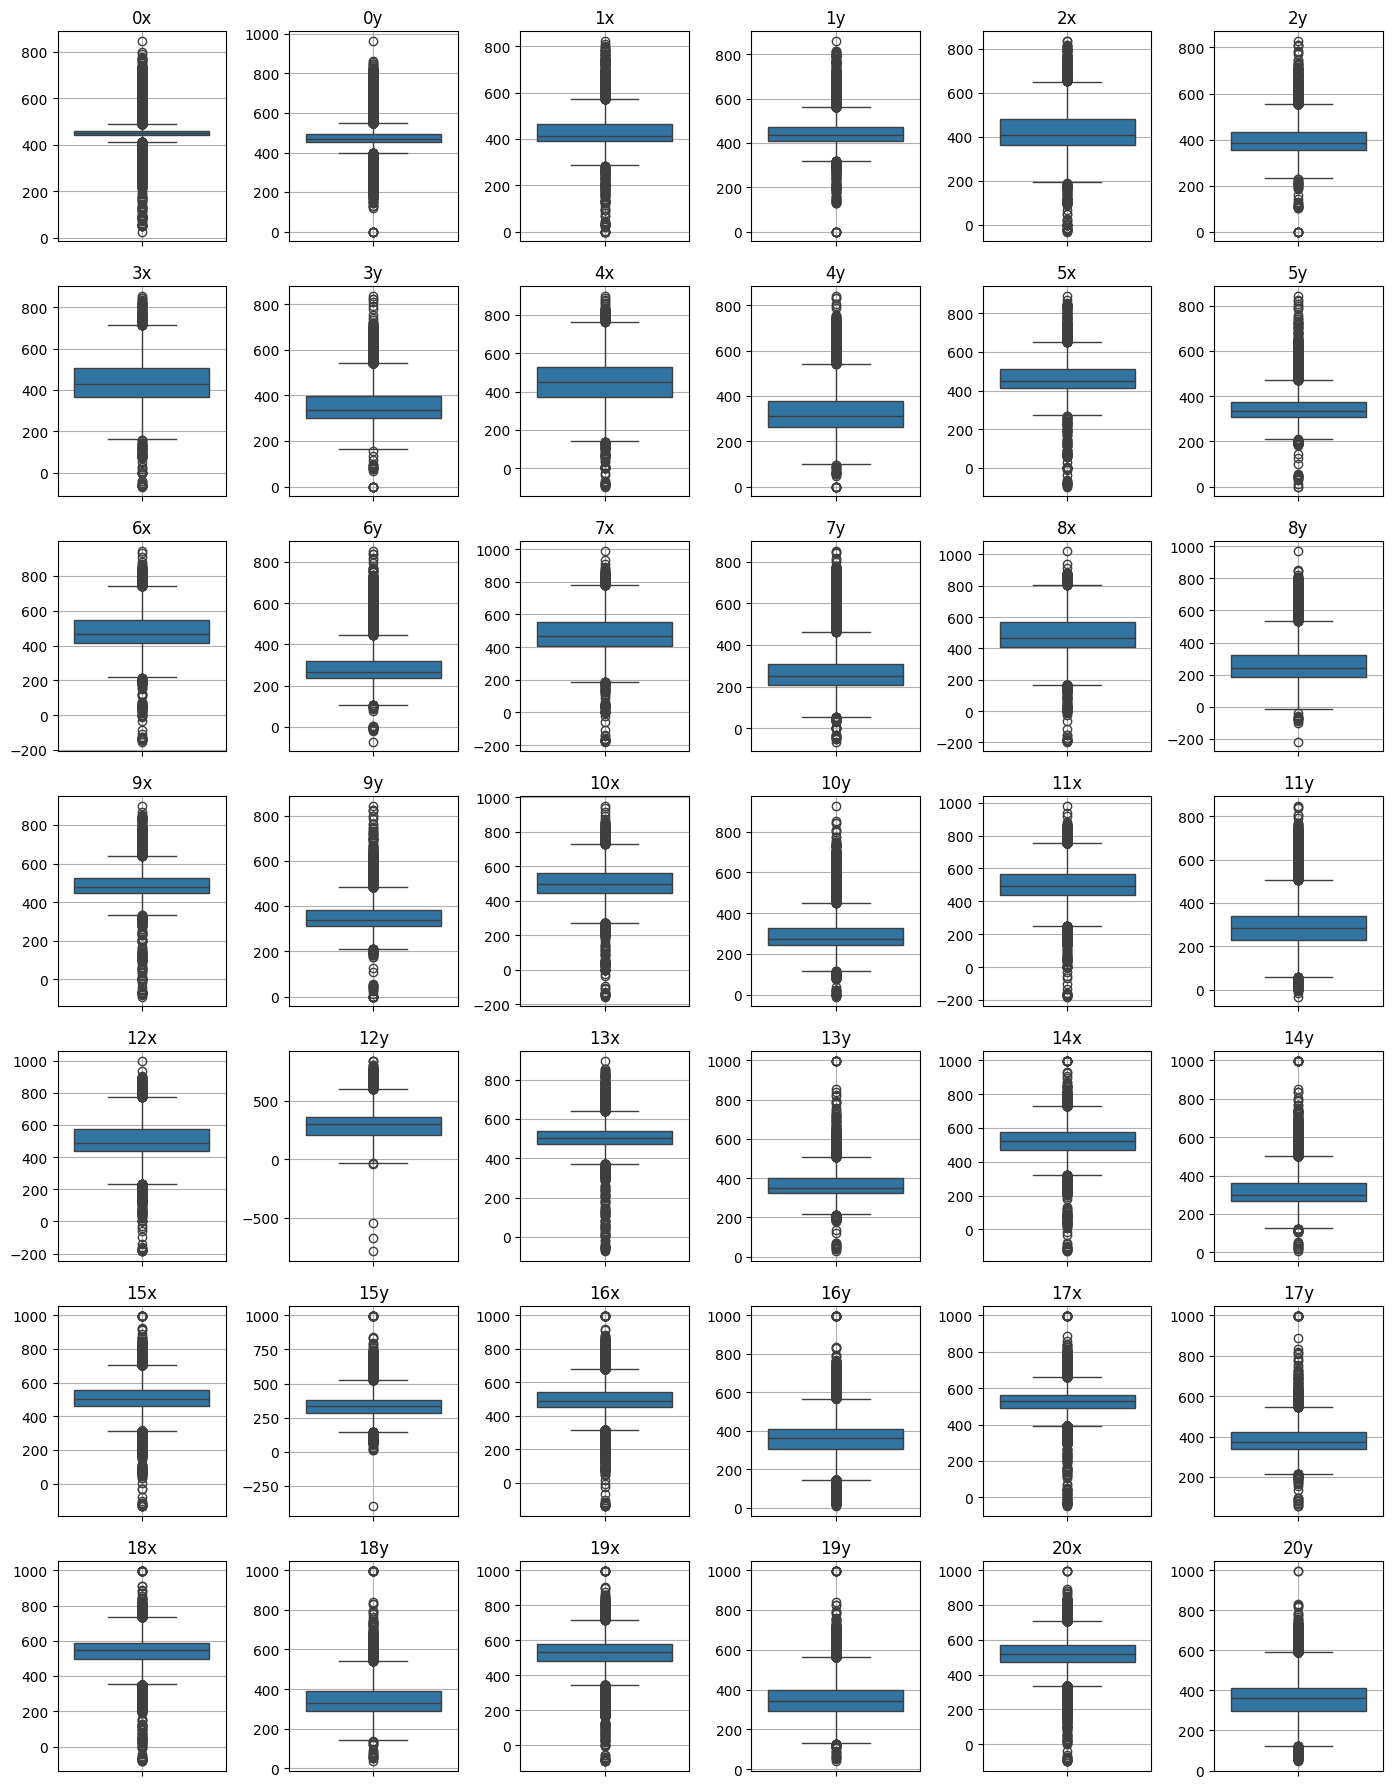

In [174]:
n_col = 6
n_rows = int(np.ceil(len(num_col) / n_col))

fig, axes = plt.subplots(n_rows, n_col, figsize=(n_rows * 2, n_col * 3))
axes = axes.flatten()

for i, col in enumerate(num_col):
    data = df[col]
    ax = axes[i]
    
    ax.set_title(col)
    sns.boxplot(y=data, ax=ax)
    ax.set_ylabel(None)
    ax.grid(True)
    
for j in range(len(num_col), n_rows * n_col):
    plt.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Visualisasi Outlier setelah menggunakan IQR

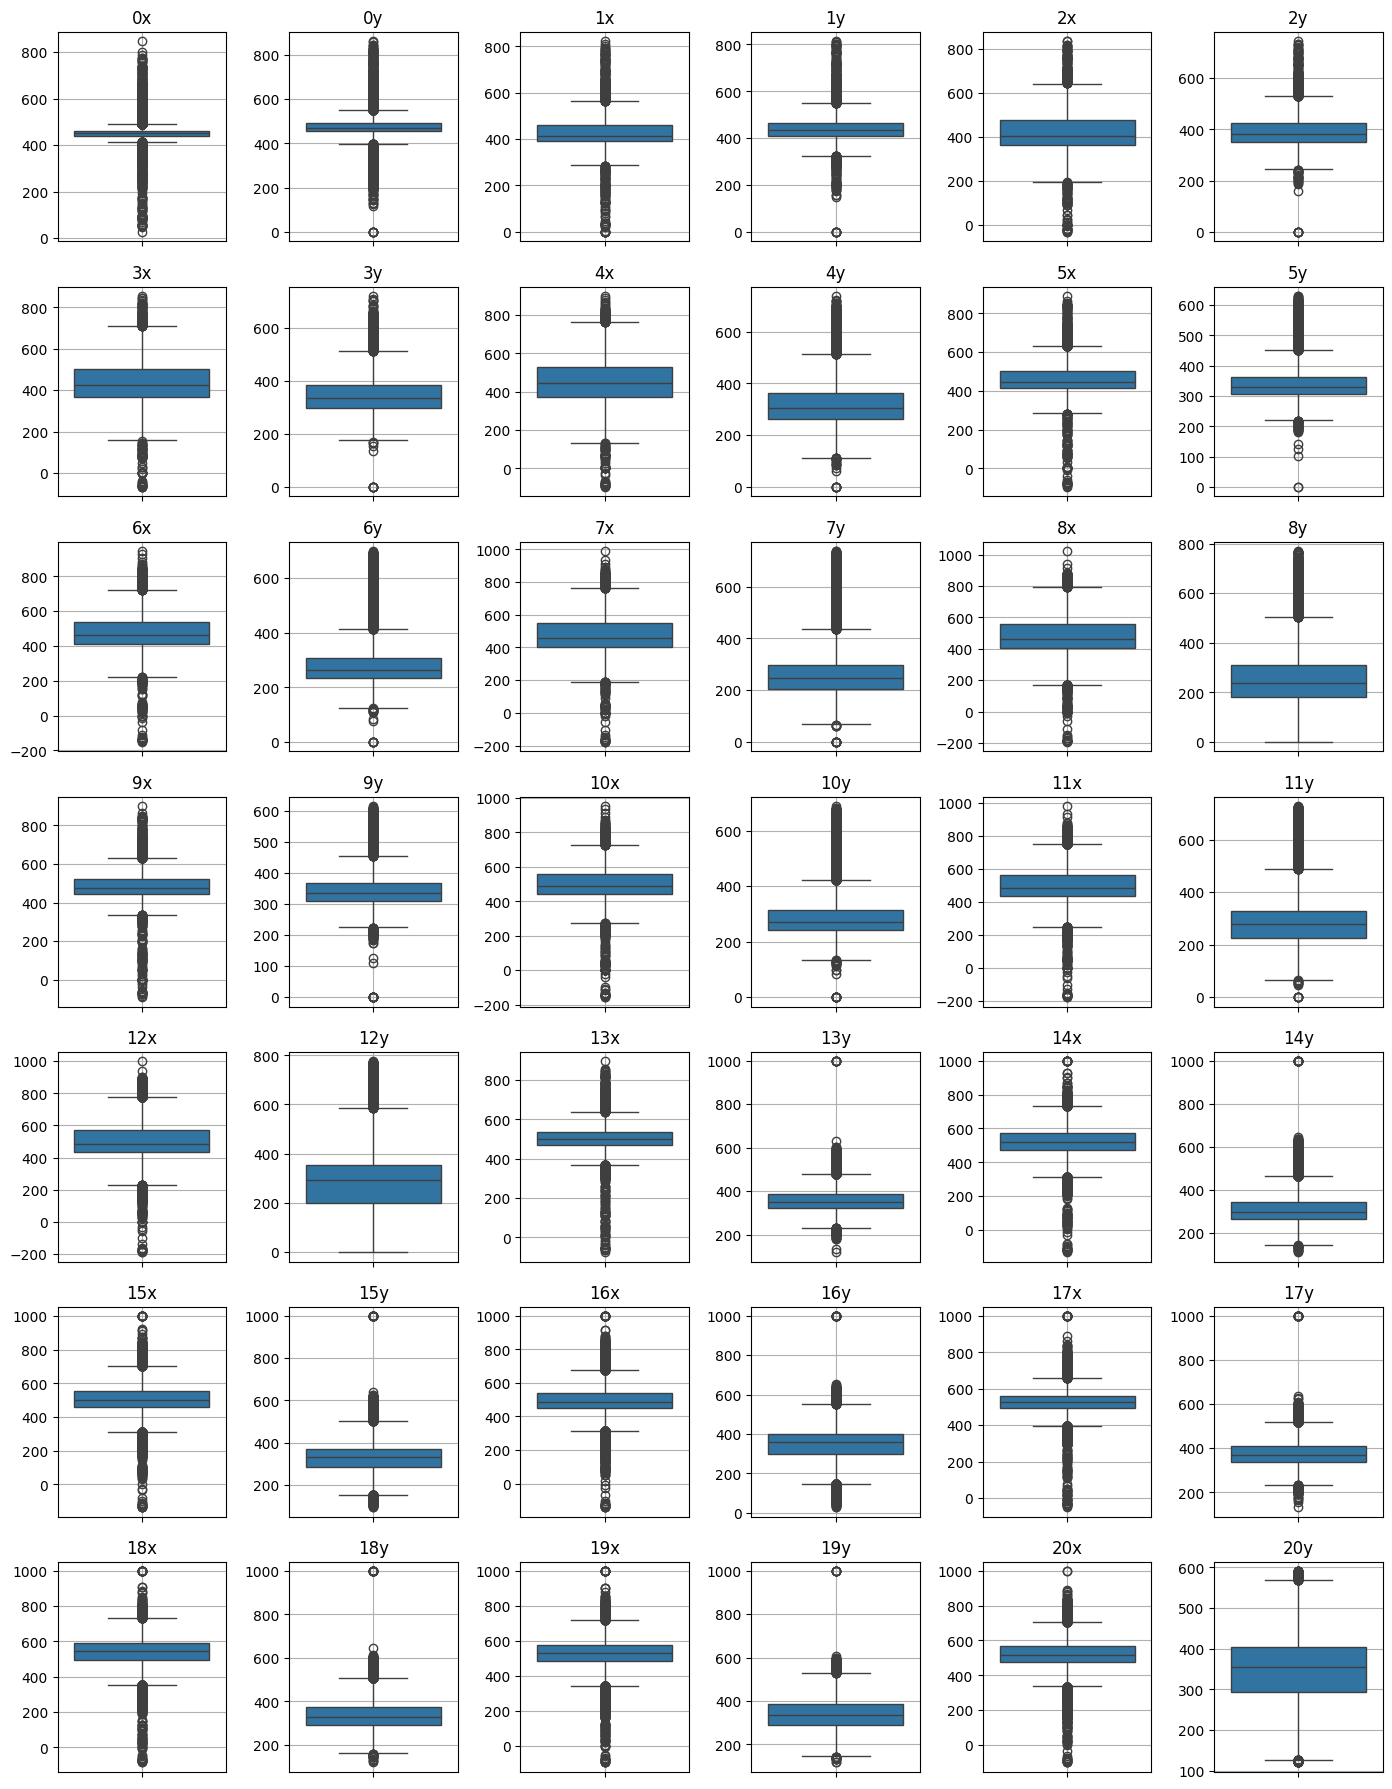

In [175]:
n_col = 6
n_rows = int(np.ceil(len(num_col) / n_col))

fig, axes = plt.subplots(n_rows, n_col, figsize=(n_rows * 2, n_col * 3))
axes = axes.flatten()

for i, col in enumerate(num_col):
    data = df_all_outliers[col]
    ax = axes[i]
    
    ax.set_title(col)
    sns.boxplot(y=data, ax=ax)
    ax.set_ylabel(None)
    ax.grid(True)
    
for j in range(len(num_col), n_rows * n_col):
    plt.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

## Feature Selection

### Encoding Kolom Kategorikal

kenapa kolom yang kategorikal harus di encoding? karena model hanya bisa membaca angka tidak bisa membaca text atau string maka kita perlu melakukan encoding untuk mengubah string atau text ke numerik atau angka, contoh seperti diatas

In [176]:
def label_encoder(df: pd.DataFrame):
    struct = dict()
    
    for col in df.select_dtypes("object").columns:
        unq = df[col].unique()
        unq_map = {v: k for k, v in enumerate(unq)}
        
        struct[col] = unq_map
        df[col] = df[col].map(unq_map)
    
    return df, struct

df_enc = df_all_outliers.copy()
df_enc, struct = label_encoder(df_enc)
df_enc.head().style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
1,459.426000,638.641000,347.614000,599.550000,273.522000,486.969000,262.374000,354.810000,248.102000,248.011000,360.925000,374.588000,373.911000,243.114000,369.098000,328.899000,364.611000,393.163000,437.945000,389.061000,448.776000,248.740000,427.998000,383.067000,424.256000,456.097000,509.395000,404.862000,526.426000,276.091000,496.461000,407.832000,492.551000,471.021000,587.605000,425.540000,598.047000,337.165000,559.660000,410.858000,548.164000,455.238000,0
2,444.194000,659.268000,326.598000,616.910000,253.226000,497.914000,243.082000,361.876000,239.491000,259.676000,343.380000,363.937000,354.870000,244.351000,358.127000,343.693000,360.158000,413.798000,418.447000,374.496000,427.227000,265.603000,412.909000,399.414000,413.379000,462.574000,487.232000,390.883000,503.429000,294.534000,477.267000,425.357000,476.143000,476.613000,560.803000,418.030000,567.584000,346.090000,533.656000,416.844000,524.283000,450.811000,0
3,443.780000,650.429000,324.970000,607.825000,252.818000,487.201000,244.345000,356.561000,243.655000,256.638000,354.901000,367.226000,360.576000,246.427000,360.391000,346.481000,365.212000,413.227000,425.959000,380.323000,434.270000,265.427000,415.955000,403.168000,416.489000,460.397000,493.925000,395.117000,512.095000,291.894000,481.303000,424.206000,478.711000,473.187000,573.173000,418.568000,580.205000,339.026000,541.187000,411.295000,528.062000,445.777000,0
4,452.860000,638.769000,340.436000,595.407000,272.323000,487.497000,254.365000,357.569000,231.482000,241.993000,345.978000,381.637000,359.122000,239.129000,353.375000,323.262000,345.418000,384.235000,424.534000,395.104000,437.792000,249.516000,418.391000,374.156000,413.062000,437.416000,499.487000,409.557000,510.173000,280.568000,485.889000,408.379000,484.368000,463.566000,577.341000,425.073000,581.486000,337.553000,551.375000,410.228000,546.574000,449.936000,0
5,457.552000,653.649000,335.113000,624.058000,264.734000,510.101000,253.082000,378.250000,236.840000,269.307000,363.884000,381.668000,368.143000,253.612000,366.595000,342.386000,364.061000,404.599000,433.425000,392.995000,436.512000,269.523000,420.890000,394.754000,425.847000,454.859000,500.886000,410.315000,510.245000,292.087000,483.699000,418.551000,485.678000,474.730000,579.387000,435.620000,580.810000,350.078000,548.222000,420.887000,539.430000,455.738000,0


data  kategorikal akan berubah menjai numerik, bisa di lihat kolom char

In [177]:
pd.DataFrame(struct).T.style.set_properties(**df_style).set_table_styles(table_style)

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
char,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23


ini adalah struktur nya bisa kita lihat A menjadi 0 dan B menjadi 1 dan seterusnya

In [178]:
df_fe_select = df_enc.drop(columns=['0x', '0y', '1x', '1y', '2x', '2y'])
df_fe_select.head().style.set_properties(**df_style).set_table_styles(table_style)

,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
1,262.374000,354.810000,248.102000,248.011000,360.925000,374.588000,373.911000,243.114000,369.098000,328.899000,364.611000,393.163000,437.945000,389.061000,448.776000,248.740000,427.998000,383.067000,424.256000,456.097000,509.395000,404.862000,526.426000,276.091000,496.461000,407.832000,492.551000,471.021000,587.605000,425.540000,598.047000,337.165000,559.660000,410.858000,548.164000,455.238000,0
2,243.082000,361.876000,239.491000,259.676000,343.380000,363.937000,354.870000,244.351000,358.127000,343.693000,360.158000,413.798000,418.447000,374.496000,427.227000,265.603000,412.909000,399.414000,413.379000,462.574000,487.232000,390.883000,503.429000,294.534000,477.267000,425.357000,476.143000,476.613000,560.803000,418.030000,567.584000,346.090000,533.656000,416.844000,524.283000,450.811000,0
3,244.345000,356.561000,243.655000,256.638000,354.901000,367.226000,360.576000,246.427000,360.391000,346.481000,365.212000,413.227000,425.959000,380.323000,434.270000,265.427000,415.955000,403.168000,416.489000,460.397000,493.925000,395.117000,512.095000,291.894000,481.303000,424.206000,478.711000,473.187000,573.173000,418.568000,580.205000,339.026000,541.187000,411.295000,528.062000,445.777000,0
4,254.365000,357.569000,231.482000,241.993000,345.978000,381.637000,359.122000,239.129000,353.375000,323.262000,345.418000,384.235000,424.534000,395.104000,437.792000,249.516000,418.391000,374.156000,413.062000,437.416000,499.487000,409.557000,510.173000,280.568000,485.889000,408.379000,484.368000,463.566000,577.341000,425.073000,581.486000,337.553000,551.375000,410.228000,546.574000,449.936000,0
5,253.082000,378.250000,236.840000,269.307000,363.884000,381.668000,368.143000,253.612000,366.595000,342.386000,364.061000,404.599000,433.425000,392.995000,436.512000,269.523000,420.890000,394.754000,425.847000,454.859000,500.886000,410.315000,510.245000,292.087000,483.699000,418.551000,485.678000,474.730000,579.387000,435.620000,580.810000,350.078000,548.222000,420.887000,539.430000,455.738000,0


menghapus fitur yang menurut kami kurang memberikan informasi karena titik 0x,y 1x,y dan 2x,y ini berada di telapak tangan bagian bawah sehingga ini akan kurang memberikan informasi dan juga ini juga sudah saya coba lihat __korelasi heatmap dan mutual information__ juga fitur² ini korelasi nya sangat kecil ke fitur target

In [179]:
drop = pd.DataFrame(['0x', '0y', '1x', '1y', '2x', '2y'])
print('Fitur yang di hapus:')
drop.T.style.set_properties(**df_style).set_table_styles(table_style)

Fitur yang di hapus:


,0,1,2,3,4,5
0,0x,0y,1x,1y,2x,2y


In [180]:
fitur = pd.DataFrame([col for col in num_col if col not in ['0x', '0y', '1x', '1y', '2x', '2y']])
print('Fitur Yang di Pertahankan : ')
fitur.T.style.set_properties(**df_style).set_table_styles(table_style)

Fitur Yang di Pertahankan : 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y


#### Simpan Dataset yang sudah di Clean ke Csv

In [181]:
# df_final = df_fe_select
# df_final.to_csv('../data/results/Clean_Datafull_Train.csv', index=False)

# PreProcessing Testing Dataset

In [182]:
df = pd.read_csv('../data/Datafull terakhir test.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8213 entries, 0 to 8212
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0x      8213 non-null   float64
 1   0y      8213 non-null   float64
 2   1x      8213 non-null   float64
 3   1y      8213 non-null   float64
 4   2x      8213 non-null   float64
 5   2y      8213 non-null   float64
 6   3x      8213 non-null   float64
 7   3y      8213 non-null   float64
 8   4x      8213 non-null   float64
 9   4y      8213 non-null   float64
 10  5x      8213 non-null   float64
 11  5y      8213 non-null   float64
 12  6x      8213 non-null   float64
 13  6y      8213 non-null   float64
 14  7x      8213 non-null   float64
 15  7y      8213 non-null   float64
 16  8x      8213 non-null   float64
 17  8y      8213 non-null   float64
 18  9x      8213 non-null   float64
 19  9y      8213 non-null   float64
 20  10x     8213 non-null   float64
 21  10y     8213 non-null   float64
 22  

### Membagi Kolom Numerik dan Kategorikal untuk memudahkan Analisis

In [183]:
num_col = df.select_dtypes(include='number').columns.to_list()
cat_col = df.select_dtypes(include='object').columns.to_list()

print(f'Numerikal Kolom : {num_col}')
print(f'Kategorikal Kolom : {cat_col}')

Numerikal Kolom : ['0x', '0y', '1x', '1y', '2x', '2y', '3x', '3y', '4x', '4y', '5x', '5y', '6x', '6y', '7x', '7y', '8x', '8y', '9x', '9y', '10x', '10y', '11x', '11y', '12x', '12y', '13x', '13y', '14x', '14y', '15x', '15y', '16x', '16y', '17x', '17y', '18x', '18y', '19x', '19y', '20x', '20y']
Kategorikal Kolom : ['char']


### Cek Nilai Unik di kolom kategori

In [184]:
for col in cat_col:
    print(f'{col} : {df[col].unique()}')

char : [nan 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y']


### Cek Missing Values

In [185]:
df.isnull().sum().to_frame().T.style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,3,5,0,2,1,1,0,0,0,0,0,19


### Mengisi Nilai Nan di kolom char dengan Forward Fill

In [186]:
df['char'] = df['char'].fillna(df['char'].ffill())
df.head().style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,449.429000,643.857000,327.271000,587.170000,265.731000,484.233000,246.689000,362.602000,231.657000,252.290000,360.884000,377.397000,363.109000,244.004000,354.410000,313.359000,346.489000,362.379000,433.281000,391.426000,435.355000,246.869000,412.976000,376.304000,403.950000,444.913000,506.447000,408.433000,513.091000,285.027000,481.830000,420.966000,473.302000,480.806000,582.295000,427.375000,587.343000,339.388000,547.296000,415.208000,536.242000,454.387000,nan
1,451.351000,653.700000,333.252000,594.944000,265.111000,486.310000,256.936000,354.813000,248.984000,239.251000,359.198000,380.020000,368.258000,250.857000,354.476000,344.851000,346.646000,409.193000,440.803000,396.510000,454.738000,255.772000,422.677000,395.540000,411.797000,468.115000,516.261000,414.213000,533.575000,287.628000,493.925000,426.902000,487.976000,491.502000,598.279000,438.230000,609.486000,345.403000,559.002000,414.437000,543.311000,457.700000,A
2,457.565000,692.363000,335.312000,635.283000,267.992000,518.501000,261.948000,388.552000,264.993000,288.713000,368.624000,385.086000,372.389000,267.188000,371.649000,360.794000,371.645000,421.847000,440.985000,398.569000,451.263000,283.505000,432.325000,415.785000,427.730000,480.256000,510.835000,419.127000,529.195000,310.469000,496.712000,437.848000,492.464000,490.838000,584.324000,453.037000,589.529000,370.452000,548.982000,435.461000,536.997000,465.605000,A
3,454.034000,534.794000,333.222000,489.421000,258.394000,399.013000,232.771000,269.755000,218.668000,160.658000,315.157000,310.358000,315.451000,171.108000,322.636000,227.749000,325.991000,268.602000,390.424000,313.667000,389.210000,165.242000,375.874000,285.715000,369.374000,352.610000,460.156000,314.143000,462.445000,175.915000,448.669000,301.393000,448.802000,358.808000,537.166000,308.455000,531.600000,212.394000,505.065000,284.374000,499.484000,329.256000,A
4,449.840000,545.633000,327.645000,504.473000,256.748000,405.653000,228.244000,273.756000,210.097000,166.311000,321.690000,300.292000,322.043000,170.581000,328.553000,251.784000,333.386000,308.906000,398.443000,311.010000,392.894000,171.972000,382.359000,292.786000,384.574000,360.037000,469.496000,313.724000,474.891000,188.099000,455.471000,309.919000,454.644000,365.462000,545.115000,312.461000,548.587000,221.122000,514.636000,287.484000,503.828000,326.010000,A


### Drop Nilai Null atau Nan

In [187]:
df = df.dropna()
df.isnull().sum().to_frame().T.style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cek dan Hapus kolom yang datanya ada data duplikat

In [188]:
print(df.duplicated().sum())

4


In [189]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


### Menangani Outlier

In [190]:
df_all_outlier = df.copy()
for col in num_col:
    Q1 = df_all_outlier[col].quantile(0.25)
    Q3 = df_all_outlier[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_all_outliers = df_all_outlier[(df_all_outlier[col] >= lower) & (df_all_outlier[col] <= upper)]

In [191]:
print(f'Sebelum di IQR : {df.shape}')
print(f'Setelah di IQR : {df_all_outliers.shape}')

Sebelum di IQR : (8191, 43)
Setelah di IQR : (7746, 43)


### Encoding Kolom Kategorikal

In [192]:
def label_encoder(df: pd.DataFrame):
    struct = dict()
    
    for col in df.select_dtypes("object").columns:
        unq = df[col].unique()
        unq_map = {v: k for k, v in enumerate(unq)}
        
        struct[col] = unq_map
        df[col] = df[col].map(unq_map)
    
    return df, struct

df_enc = df_all_outliers.copy()
df_enc, struct = label_encoder(df_enc)
df_enc.head().style.set_properties(**df_style).set_table_styles(table_style)

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
1,451.351000,653.700000,333.252000,594.944000,265.111000,486.310000,256.936000,354.813000,248.984000,239.251000,359.198000,380.020000,368.258000,250.857000,354.476000,344.851000,346.646000,409.193000,440.803000,396.510000,454.738000,255.772000,422.677000,395.540000,411.797000,468.115000,516.261000,414.213000,533.575000,287.628000,493.925000,426.902000,487.976000,491.502000,598.279000,438.230000,609.486000,345.403000,559.002000,414.437000,543.311000,457.700000,0
2,457.565000,692.363000,335.312000,635.283000,267.992000,518.501000,261.948000,388.552000,264.993000,288.713000,368.624000,385.086000,372.389000,267.188000,371.649000,360.794000,371.645000,421.847000,440.985000,398.569000,451.263000,283.505000,432.325000,415.785000,427.730000,480.256000,510.835000,419.127000,529.195000,310.469000,496.712000,437.848000,492.464000,490.838000,584.324000,453.037000,589.529000,370.452000,548.982000,435.461000,536.997000,465.605000,0
3,454.034000,534.794000,333.222000,489.421000,258.394000,399.013000,232.771000,269.755000,218.668000,160.658000,315.157000,310.358000,315.451000,171.108000,322.636000,227.749000,325.991000,268.602000,390.424000,313.667000,389.210000,165.242000,375.874000,285.715000,369.374000,352.610000,460.156000,314.143000,462.445000,175.915000,448.669000,301.393000,448.802000,358.808000,537.166000,308.455000,531.600000,212.394000,505.065000,284.374000,499.484000,329.256000,0
4,449.840000,545.633000,327.645000,504.473000,256.748000,405.653000,228.244000,273.756000,210.097000,166.311000,321.690000,300.292000,322.043000,170.581000,328.553000,251.784000,333.386000,308.906000,398.443000,311.010000,392.894000,171.972000,382.359000,292.786000,384.574000,360.037000,469.496000,313.724000,474.891000,188.099000,455.471000,309.919000,454.644000,365.462000,545.115000,312.461000,548.587000,221.122000,514.636000,287.484000,503.828000,326.010000,0
5,463.842000,550.886000,334.868000,506.275000,258.927000,407.689000,242.522000,275.063000,240.289000,165.256000,344.741000,292.345000,331.180000,175.742000,332.242000,263.398000,336.843000,327.126000,422.553000,302.328000,402.248000,166.150000,393.401000,288.414000,403.548000,360.955000,494.348000,308.548000,483.814000,181.491000,466.818000,301.972000,472.880000,362.204000,572.307000,316.280000,568.785000,218.200000,536.225000,272.665000,530.120000,311.422000,0


In [193]:
df_fe_select = df_enc.drop(columns=['0x', '0y', '1x', '1y', '2x', '2y'])
df_fe_select.head().style.set_properties(**df_style).set_table_styles(table_style)

,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
1,256.936000,354.813000,248.984000,239.251000,359.198000,380.020000,368.258000,250.857000,354.476000,344.851000,346.646000,409.193000,440.803000,396.510000,454.738000,255.772000,422.677000,395.540000,411.797000,468.115000,516.261000,414.213000,533.575000,287.628000,493.925000,426.902000,487.976000,491.502000,598.279000,438.230000,609.486000,345.403000,559.002000,414.437000,543.311000,457.700000,0
2,261.948000,388.552000,264.993000,288.713000,368.624000,385.086000,372.389000,267.188000,371.649000,360.794000,371.645000,421.847000,440.985000,398.569000,451.263000,283.505000,432.325000,415.785000,427.730000,480.256000,510.835000,419.127000,529.195000,310.469000,496.712000,437.848000,492.464000,490.838000,584.324000,453.037000,589.529000,370.452000,548.982000,435.461000,536.997000,465.605000,0
3,232.771000,269.755000,218.668000,160.658000,315.157000,310.358000,315.451000,171.108000,322.636000,227.749000,325.991000,268.602000,390.424000,313.667000,389.210000,165.242000,375.874000,285.715000,369.374000,352.610000,460.156000,314.143000,462.445000,175.915000,448.669000,301.393000,448.802000,358.808000,537.166000,308.455000,531.600000,212.394000,505.065000,284.374000,499.484000,329.256000,0
4,228.244000,273.756000,210.097000,166.311000,321.690000,300.292000,322.043000,170.581000,328.553000,251.784000,333.386000,308.906000,398.443000,311.010000,392.894000,171.972000,382.359000,292.786000,384.574000,360.037000,469.496000,313.724000,474.891000,188.099000,455.471000,309.919000,454.644000,365.462000,545.115000,312.461000,548.587000,221.122000,514.636000,287.484000,503.828000,326.010000,0
5,242.522000,275.063000,240.289000,165.256000,344.741000,292.345000,331.180000,175.742000,332.242000,263.398000,336.843000,327.126000,422.553000,302.328000,402.248000,166.150000,393.401000,288.414000,403.548000,360.955000,494.348000,308.548000,483.814000,181.491000,466.818000,301.972000,472.880000,362.204000,572.307000,316.280000,568.785000,218.200000,536.225000,272.665000,530.120000,311.422000,0


In [194]:
drop = pd.DataFrame(["0x", "0y", "1x", "1y", "2x", "2y"])
print("Fitur yang di hapus :")
drop.T.style.set_properties(**df_style).set_table_styles(table_style)

Fitur yang di hapus :


,0,1,2,3,4,5
0,0x,0y,1x,1y,2x,2y


In [195]:
fitur = pd.DataFrame([col for col in num_col if col not in ['0x', '0y', '1x', '1y', '2x', '2y']])
print('Fitur Yang di Pertahankan : ')
fitur.T.style.set_properties(**df_style).set_table_styles(table_style)

Fitur Yang di Pertahankan : 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,8x,8y,9x,9y,10x,10y,11x,11y,12x,12y,13x,13y,14x,14y,15x,15y,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y


#### Simpan Dataset yang sudah di Clean ke Csv

In [196]:
# df_final = df_fe_select
# df_final.to_csv('../data/results/Clean_DataFull_Terakhir_Test.csv', index=False)

# Modeling

## Import clean training

In [197]:
df = pd.read_csv('../data/results/Clean_Datafull_Train.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30891 entries, 0 to 30890
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3x      30891 non-null  float64
 1   3y      30891 non-null  float64
 2   4x      30891 non-null  float64
 3   4y      30891 non-null  float64
 4   5x      30891 non-null  float64
 5   5y      30891 non-null  float64
 6   6x      30891 non-null  float64
 7   6y      30891 non-null  float64
 8   7x      30891 non-null  float64
 9   7y      30891 non-null  float64
 10  8x      30891 non-null  float64
 11  8y      30891 non-null  float64
 12  9x      30891 non-null  float64
 13  9y      30891 non-null  float64
 14  10x     30891 non-null  float64
 15  10y     30891 non-null  float64
 16  11x     30891 non-null  float64
 17  11y     30891 non-null  float64
 18  12x     30891 non-null  float64
 19  12y     30891 non-null  float64
 20  13x     30891 non-null  float64
 21  13y     30891 non-null  float64
 22

## Splitting data<br>
Pisahkan data training dan testing pada datasets train

In [198]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, test_size: float = 0.2, random_state:int = None):
    if random_state:
        np.random.seed(random_state)
    
    n_samples = len(X)                                                  # Total sampel
    shuffle_indices = np.random.permutation(np.arange(n_samples))       # Buat index sepanjang total sampel dan shuffle
  
    # Hitung ukuran besaran train dan test
    test_size = round(test_size * n_samples)
    train_size = n_samples - test_size
    
    # Masukkan kedalam index yang sudah di acak berdasarkan train dan test index
    train_indices = shuffle_indices[:train_size]
    test_indices = shuffle_indices[test_size:]
    
    # Pilih data berdasarkan index di atas
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    return [X_train, X_test, y_train, y_test]

X = df.drop(columns=["char"])
y = df.char

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,...,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y
16647,309.393,299.332,312.029,257.232,387.443,300.362,384.044,232.493,377.752,265.659,...,450.978,368.835,527.232,331.413,517.361,272.506,489.231,317.750,488.708,351.268
21996,387.083,281.258,405.381,233.078,394.222,329.344,405.483,248.008,414.128,204.261,...,456.951,344.448,512.032,358.147,535.355,293.712,506.716,315.892,480.105,350.661
1092,447.262,244.328,469.343,191.359,482.863,303.603,525.640,247.255,517.898,266.110,...,512.213,378.192,568.555,394.576,608.392,357.038,579.438,368.433,564.238,382.227
457,405.841,263.826,407.170,206.146,432.230,328.114,442.231,263.934,441.899,289.457,...,484.621,397.431,538.124,377.907,555.459,326.396,525.993,356.455,512.364,386.925
20843,504.628,308.034,550.672,308.964,539.200,313.138,603.786,257.056,644.091,222.889,...,513.806,362.316,572.529,410.486,599.227,370.065,565.543,359.503,529.176,364.367


## Scaler data train<br>

### Min-Max Scaler<br>
$$
S(X) = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

In [199]:
def min_max_scaler(X: pd.DataFrame):
    return ((X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)))

X_train_mm_scaler = min_max_scaler(X_train)
X_test_mm_scaler = min_max_scaler(X_test)

X_train_mm_scaler.head()

,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,...,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y
16647,0.416787,0.423556,0.413973,0.355381,0.502927,0.477050,0.492116,0.333050,0.499173,0.360254,...,0.519674,0.350538,0.550853,0.229287,0.556041,0.162116,0.533840,0.215581,0.536004,0.491026
21996,0.502687,0.397981,0.508687,0.322011,0.509981,0.523080,0.512087,0.355275,0.531892,0.276994,...,0.524927,0.325329,0.536324,0.260238,0.572692,0.186637,0.549889,0.213435,0.528153,0.489733
1092,0.569226,0.345725,0.573582,0.264373,0.602214,0.482197,0.624012,0.354196,0.625228,0.360866,...,0.573529,0.360210,0.590352,0.302413,0.640279,0.259862,0.616635,0.274100,0.604935,0.556966
457,0.523428,0.373315,0.510502,0.284802,0.549529,0.521127,0.546317,0.378089,0.556870,0.392526,...,0.549262,0.380097,0.561264,0.283115,0.591296,0.224430,0.567582,0.260270,0.557593,0.566972
20843,0.632654,0.435869,0.656098,0.426851,0.660833,0.497341,0.696804,0.368237,0.738732,0.302255,...,0.574930,0.343799,0.594151,0.320833,0.631798,0.274925,0.603882,0.263790,0.572937,0.518925


### Standard Scaler<br>
$$
S(X) = \frac{X - \bar{X}}{\sigma}
$$

In [200]:
def std_scaler(X: pd.DataFrame):
    return ((X - X.mean(axis=0)) / X.std(axis=0))

X_train_std_scaler = std_scaler(X_train)
X_test_std_scaler = std_scaler(X_test)

X_train_std_scaler.head()

,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,...,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y
16647,-1.241773,-0.659210,-1.130153,-0.714694,-0.998550,-0.733967,-0.936521,-0.608013,-0.894564,-0.019010,...,-0.449224,0.192872,0.083378,-0.752895,-0.210021,-0.876254,-0.381250,-0.331916,-0.283701,-0.006403
21996,-0.484570,-0.895021,-0.369351,-0.976525,-0.906005,-0.227263,-0.725113,-0.422478,-0.586538,-0.639786,...,-0.391593,-0.053518,-0.144850,-0.337881,-0.007073,-0.606601,-0.196482,-0.354436,-0.371220,-0.013156
1092,0.101963,-1.376846,0.151928,-1.428762,0.304093,-0.677303,0.459740,-0.431483,0.292168,-0.014450,...,0.141609,0.287409,0.703843,0.227636,0.816684,0.198644,0.571989,0.282399,0.484678,0.338052
457,-0.301745,-1.122456,-0.354771,-1.268470,-0.387132,-0.248767,-0.362746,-0.232029,-0.351378,0.221604,...,-0.124616,0.481787,0.246922,-0.031131,0.219672,-0.190996,0.007223,0.137217,-0.043044,0.390322
20843,0.661080,-0.545675,0.814745,-0.153915,1.073187,-0.510599,1.230329,-0.314279,1.360748,-0.451444,...,0.156979,0.127008,0.763513,0.474620,0.713315,0.364294,0.425157,0.174161,0.127987,0.139339


### Principal Components Analysis (PCA)

In [201]:
def pca(X: pd.DataFrame, n_components: int):
    x_centered = X - X.mean()                                       # Standarisasi Data
    cov_matrix = np.cov(x_centered, rowvar=False)                   # Pilih variasi matrix dari datasets
    eigenvalues, eigenmatrix = np.linalg.eigh(cov_matrix)           # Nilai eigenvalues dari variasi matrix
    
    sorted_eigenvalues = np.argsort(eigenvalues)[::-1]              # Sorting nilai eigenvalues dari terbesar ke terkecil
    sorted_eigenmatrix = eigenmatrix[:, sorted_eigenvalues]         # Sorting nilai eigenmatrix berdasarkan eigenvalues
    
    principal_components = sorted_eigenmatrix[:, :n_components]     # Pilih eigenmatrix yg sudah di sort berdasarkan n_components
    
    X_pca = np.dot(x_centered, principal_components)                # Kali silang matrix
    return pd.DataFrame(X_pca)

X_train_pca = pca(X_train, n_components=3)
X_test_pca = pca(X_test, n_components=3)

X_train_pca.head(10)

,0,1,2
0,314.017961,66.334555,-95.542141
1,242.548687,-54.000074,-71.770332
2,-106.744740,-83.392792,-130.553859
3,72.201351,62.199812,-109.006241
4,-344.863130,-261.286587,1.644969
5,226.457058,-267.128157,8.780826
6,109.930362,-31.846233,43.279426
7,18.086130,-101.246224,-109.884500
8,162.433685,-131.395255,-41.235123
9,90.378866,77.749843,-140.066425


## Build KNN models <br>
1. Hitung semua jarak test dengan train
2. Urutkan jarak-jarak lalu ambil class label dengan cangkupan K
3. Lakukan voting, jika voting menghasilkan kandidat yang sama, maka akan ada opsi pemilihan lagi:
   - "default" ambil paling cepat paling baik
   - "sort" ambil data dengan nilai terkcil
   - "random_choice" pilih secara acak

Fitur tambahan:
Selain voting ada fitur penghitungan bobot berdasarkan jarak terdekat, jika bobot paling dekat dan banyak class yang dominan dari class indominan maka class tersebut yang akan di pilih. Setelah di pilih berdasarkan cangkupan K maka akan di lakukan voting.

##### Jenis-jenis distance<br>
1. Euclidean
   Menghitung jarak secara garis lurus atau linear, dengan rumus seperti ini
   $$
   D(a, b) = \sqrt{\sum_i (a_i - b_i)^2}
   $$

2. Manhattan
   Menghitung jarak secara belok-belok, dengan rumus seperti ini
   $$
   D(a, b) = \sum_i |a_i - b_i|
   $$

3. Minkowski
   Menghitung jarak secara lurus namun berbelok, karena minkowski ini adalah distance versi generalisasi dari Euclidean dan Manhattan, bisa di lihat dari rumus ini:
   $$
   D(a, b) = \left( \sum_i |a - b|^p \right) ^{1/p}
   $$

In [202]:
class KNN:
    def __init__(self, k: int, p: int, weight, voting:str = "default"):
        self.k = k              # Nilai K untuk mencangkup NN
        self.p = p              # Nilai P untuk tipe distance
        self.weight = weight    # weight untuk tipe pembobotan
        self.voting = voting    # voting untuk jenis voting
    
    def fit(self, X_train: pd.DataFrame, y_train: pd.DataFrame):
        # Set nilai train & testing
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()
        
    def _minkowski_distance(self, a, b):
        # Minkowski distance karena generalisasi dari Euclidean(2) dan Manhattan(1) distance
        return np.power(np.sum(np.abs(a - b) ** self.p, axis=1), 1 / self.p)
    
    def _get_nn(self, X_test: pd.DataFrame):
        distance = self._minkowski_distance(X_test, self.X_train)       # Hitung semua jarak test dengan train
        k_idxs = np.argsort(distance)[: self.k]                         # Urutkan dan cangkup class label berdasarkan K
        k_labels = [self.y_train[i] for i in k_idxs]                    # class-class label
        k_distance = [distance[i] for i in k_idxs]                      # dapatkan kembali distance namun sudah urut
        
        if self.weight == "uniform":                                    # Voting saja
            # Hitung berapa banyak jumlah kandidat dan lakukan voting
            values, counts = np.unique(k_labels, return_counts=True)
            max_count = max(counts)
            candidates = values[counts == max_count]
            
            if self.voting == "default":
                if len(candidates) > 1:
                    return np.random.choice(candidates)
                else:
                    return candidates[0]
            elif self.voting == "sort":
                if len(candidates) > 1:
                    return np.random.choice(candidates)
                else:
                    return sorted(candidates)[0]
            else:
                raise ValueError("\"voting\" argument doesn't match in options!")
        
        
        
        elif self.weight == "distance":                                 # Hitung pembobotan dan voting
            weights = [(1 / (d + 1e-5)) for d in k_distance]
        
        elif callable(self.weight):                                     # Custom distance
            weights = [self.weight(d) for d in k_distance]
        
        else:
            raise ValueError("\"voting\" argument doesn't match in options!")
        
        # Hitung berapa banyak jumlah kandidat berdasarkan bobot dan lakukan voting
        label_weights = dict()
        for label, weight in zip(k_labels, weights):
            label_weights[label] = label_weights.get(label, 0) + weight
        
        max_weight = max(label_weights.values())
        candidates = [label for label, weight in label_weights.items() if weight == max_weight]
        
        if self.voting == "default":
            if len(candidates) > 1:
                return np.random.choice(candidates)
            else:
                return candidates[0]
        elif self.voting == "sort":
            if len(candidates) > 1:
                return np.random.choice(candidates)
            else:
                return sorted(candidates)[0]
        else:
            raise ValueError("\"voting\" argument doesn't match in options!")
        
    def predict(self, X_test: pd.DataFrame):
        return np.array([
            self._get_nn(x)
            for x in X_test.to_numpy()
        ])

## Evaluation Model<br>
Matrix-matrix evaluasi model
1. Accuracy
   Menghitung semua jumlah benar dan salah baik class positif dan negatif lalu bagi jumlah data<br>
   $A = \frac{totalbenar}{jumlahdata}$

2. Precision
   Menghitung semua jumlah benar (positif) dan di bagi semua prediksi<br>
   $P = \frac{TP}{TP + FP}$

3. Recall<br>
   Menghitung semua jumlah benar (positif) dan di bagi semua dari datasets<br>
   $R = \frac{TP}{TP + FN}$

4. F1-Score<br>
   Nilai harmonik dari Precision dan Recall<br>
   $F1 = 2 \cdot \frac{PR}{P+R}$

Metode support lainnya:
- Macro Avg<br>
  Menghitung nilai rata-rata dari precision, recall dan F1-Score<br>
  $MA = \frac{P+R+F1}{3}$

- Weighted Avg<br>
  Sama seperti macro avg namun berdasarkan bobot per-class<br>
  $WA = \sum_i (\frac{w_i}{\sum_j w_{ji}}) \cdot X_i$

In [203]:
class EvaluationModel:
    def __init__(self, y_true: pd.DataFrame, y_pred: np.ndarray):
        self.y_true = y_true # Data dari datasets
        self.y_pred = y_pred # Data dari hasil prediksi model
    
    def accuracy(self):
        return np.sum(self.y_true == self.y_pred) / len(self.y_true)
    
    def precision(self, TP, FP):
        return TP / (TP + FP) if (TP + FP) != 0 else 0
    
    def recall(self, TP, FN):
        return TP / (TP + FN) if (TP + FN) != 0 else 0
    
    def f1_score(self, TP, FP, FN):
        P = self.precision(TP, FP)
        R = self.recall(TP, FN)
        
        return 2 * (P * R) / (P + R) if (P + R) != 0 else 0
    
    def macro_avg(self, report_df: pd.DataFrame):
        return report_df[["Precision", "Recall", "F1-Score"]].mean()
    
    def weighted_avg(self, report_df: pd.DataFrame):
        class_vc = self.y_true.value_counts()
        total_samples = len(self.y_true)
        
        weighted_dict = dict()
        for col in ["Precision", "Recall", "F1-Score"]:
            weighted_sum = 0
            for i, row in report_df.iterrows():
                if row["Category"] not in ["macro avg", "weighted avg"]:
                    cat = row["Category"]
                    cat_weight = class_vc.get(cat, 0) / total_samples
                    weighted_sum += cat_weight * row[col]
            
            weighted_dict[col] = weighted_sum
        
        return weighted_dict
    
    def make_report(self):
        cats = pd.Series(self.y_true).unique()
        report_dict = {"Category": [], "Precision": [], "Recall": [], "F1-Score": []}
        
        for cat in cats:
            # Confusion matrixs
            TP = np.sum((self.y_true == cat) & (self.y_pred == cat)) # Asli POSITIF prdiksi POSITIF
            TN = np.sum((self.y_true != cat) & (self.y_pred != cat)) # Asli NEGATIF prdiksi NEGATIF
            FP = np.sum((self.y_true != cat) & (self.y_pred == cat)) # Asli NEGATIF prdiksi POSITIF
            FN = np.sum((self.y_true == cat) & (self.y_pred != cat)) # Asli POSITIF prdiksi NEGATIF
            
            # Calculation matrixs
            P = self.precision(TP, FP)
            R = self.recall(TP, FN)
            F1 = self.f1_score(TP, FP, FN)
            
            # Append matrixs
            report_dict["Category"].append(cat)
            report_dict["Precision"].append(P)
            report_dict["Recall"].append(R)
            report_dict["F1-Score"].append(F1)
        
        accuracy = self.accuracy()
        
        report_df = pd.DataFrame(report_dict)
        macro_avg = self.macro_avg(report_df)
        weighted_avg = self.weighted_avg(report_df)
        
        summary_df = pd.DataFrame.from_records([
            {"Category": "macro avg", **macro_avg},
            {"Category": "weighted avg", **weighted_avg}
        ])
        
        result_df = pd.concat([report_df, summary_df], ignore_index=True)
        
        return result_df, accuracy

## Implements model with clean training datasets

In [204]:
model_final = KNN(k=7, p=2, weight="uniform", voting="sort")
model_final.fit(X_train=X_train_std_scaler, y_train=y_train)

preds = model_final.predict(X_test=X_test_std_scaler)

# Evaluation
eval_model = EvaluationModel(y_true=y_test, y_pred=preds)
report_df, accuracy = eval_model.make_report()

print(f"Accuracy model final: {accuracy*100:.2f}%")
report_df

KeyboardInterrupt: 

## Implements model with clean testing datasets

### Import data

In [ ]:
df_test = pd.read_csv("../data/results/Clean_DataFull_Terakhir_Test.csv")

X_test_val = df_test.drop(columns=["char"])
y_test_val = df_test.char

### Use model

In [ ]:
preds_final = model_final.predict(X_test=X_test_val)

# Evaluation
eval_model = EvaluationModel(y_true=y_test_val, y_pred=preds_final)
report_df, accuracy = eval_model.make_report()

print(f"Accuracy model final: {accuracy*100:.2f}%")
report_df

Accuracy model final: 3.02%


,Category,Precision,Recall,F1-Score
0,0,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,0.000000
2,2,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000
4,4,0.000000,0.000000,0.000000
5,5,0.000000,0.000000,0.000000
6,6,0.057073,0.573171,0.103810
7,7,0.333333,0.002950,0.005848
8,8,0.000000,0.000000,0.000000
9,9,0.000000,0.000000,0.000000


#### I think model is overfitting or the datasets is so good

## Try to manual predict

In [ ]:
df_test[df_test["char"] == 19].tail()

,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,...,16y,17x,17y,18x,18y,19x,19y,20x,20y,char
6351,417.927,329.612,445.609,311.176,411.955,320.928,414.468,250.992,413.523,207.315,...,374.048,515.215,365.065,525.357,320.178,504.378,345.902,485.534,376.663,19
6352,417.497,324.821,438.547,304.803,423.164,320.263,429.261,251.302,430.014,206.816,...,384.148,525.285,364.293,532.929,323.556,508.554,349.841,487.905,381.322,19
6353,429.359,303.604,451.511,280.451,428.918,310.860,436.438,234.860,438.641,190.210,...,374.055,529.165,358.837,539.758,317.298,516.420,346.123,498.733,378.189,19
6354,417.430,310.153,436.532,286.587,426.046,315.447,430.828,240.762,434.458,195.891,...,370.978,529.372,361.404,540.249,316.651,518.108,344.549,497.710,375.952,19
6355,416.689,313.621,441.608,289.915,419.134,313.454,425.139,239.132,429.157,195.444,...,374.384,521.782,363.324,535.542,320.502,513.539,349.090,494.515,378.430,19


In [ ]:
struct = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'}

In [ ]:
struct[19]

'U'

In [ ]:
from IPython.display import display

data_df = df_test.iloc[[6352]].drop(columns=["char"])
display(data_df)

# Prediksi
test_predict = model_final.predict(data_df)

print(f"Model Predict: {test_predict}")
print(f"Actual: {struct[int(test_predict)]}")

,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,...,16x,16y,17x,17y,18x,18y,19x,19y,20x,20y
6352,417.497,324.821,438.547,304.803,423.164,320.263,429.261,251.302,430.014,206.816,...,469.936,384.148,525.285,364.293,532.929,323.556,508.554,349.841,487.905,381.322


Model Predict: [14]
Actual: P


C:\Users\Aby Danu Prasetyo\AppData\Local\Temp\ipykernel_14152\4246067639.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Actual: {struct[int(test_predict)]}")
